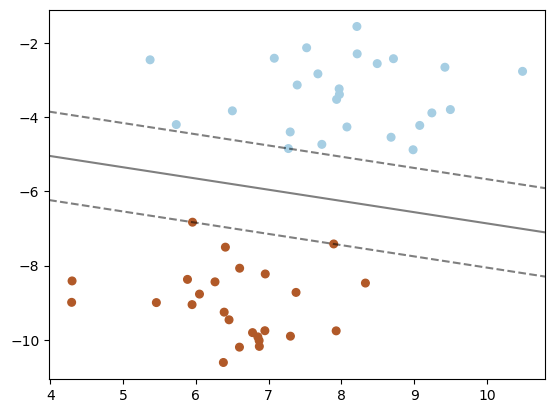

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs


# 先创建50个数据点，让它们分为两类
X, y = make_blobs(n_samples=50, centers=2, random_state=6)

# 创建一个线性内核的支持向量机模型
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)
# 把数据点画出来
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

#建立图像坐标
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()


xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# 把分类的决定边界画出来
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none')
plt.show()



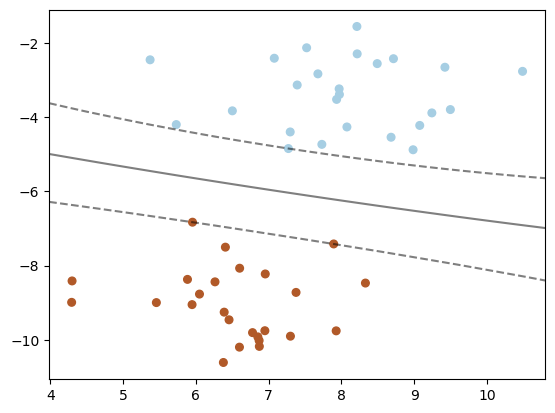

In [18]:
# 创建一个RBF内核的支持向量机模型
clf_rbf = svm.SVC(kernel='rbf', C=1000)
clf_rbf.fit(X, y)
# 把数据点画出来
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

#建立图像坐标
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()


xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf_rbf.decision_function(xy).reshape(XX.shape)

# 把分类的决定边界画出来
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(clf_rbf.support_vectors_[:, 0], clf_rbf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none')
plt.show()

1.下面的代码试图使用sklearn.datasets模块中的make_moons函数生成100个数据点，

形成两个交错的半圆。然后，创建一个度数为3的多项式SVM分类器，

并将其拟合到数据上。代码的其余部分与之前的例子类似，

使用matplotlib绘制数据点、决策边界和支持向量。

这段代码有什么问题或者可以改进之处吗？


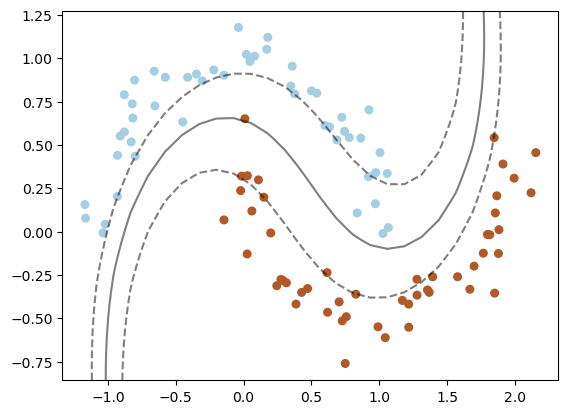

In [19]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_moons

# Generate 100 data points that form two interleaving half circles
X, y = make_moons(n_samples=100, noise=0.1, random_state=1)

# Create a polynomial SVM classifier with degree 3
clf = svm.SVC(kernel='poly', degree=3, C=1, coef0=1)
clf.fit(X, y)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# Create a meshgrid to generate a grid of points over the x-y plane
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot the decision boundary
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Plot the support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none')
plt.show()


### 各核函数特点:

1.线性核函数:参数少,速度快

2.多项式核函数:从低维到高维,更精确,计算复杂度大

3.RBF核函数:参数少,局部性强

### 如何选择合适的核函数:

1.特征多,样本规模不大:线性核函数/多项式核函数

2.特征少,样本规模大:RBF核函数

3.特征少,样本规模极大:线性核函数